# Trying to boost a category (concept)

In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
model = keras.models.load_model(os.path.join('models', 'painter_model'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 645,361
Trainable params: 645,361
Non-trai

In [3]:
dirname = "painters_ds"

In [4]:
dfs = []
for filename in os.listdir(os.path.join('activations', dirname)):
    if filename.split('.')[-1] == 'pkl' and 'table_data' not in filename:
        dfs.append(pd.read_pickle(os.path.join('activations', dirname, filename)))

In [5]:
layer_to_explore = 0
df = dfs[layer_to_explore]
print(f"Using layer {model.layers[layer_to_explore].name}")

Using layer embedding


In [6]:
df.head(1)

,category,input,true,pred,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Alexander_Semionov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0.547359,-0.328434,-0.172445,0.069439,-0.628683,1.294147,...,0.466627,0.293625,-0.208663,-0.316626,-0.006433,-0.412829,0.242208,0.072852,0.725296,-0.755482


In [7]:
df.iloc[0, 4:]

neuron_1     0.547359
neuron_2    -0.328434
neuron_3    -0.172445
neuron_4     0.069439
neuron_5    -0.628683
               ...   
neuron_60   -0.412829
neuron_61    0.242208
neuron_62    0.072852
neuron_63    0.725296
neuron_64   -0.755482
Name: http://dbpedia.org/resource/Alexander_Semionov, Length: 64, dtype: object

In [39]:
def plot_activ(df, df2=None):
    
#     plt.figure(figsize=(15, 6))
#     sns.lineplot(x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
#     if df2 is not None:
#         sns.lineplot(x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
#     plt.show()
    
#     plt.figure(figsize=(15, 6))
#     sns.scatterplot(x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
#     if df2 is not None:
#         sns.scatterplot(x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
#     plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Visualizing sample vs cat')
    
    sns.lineplot(ax=axes[0], x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
    if df2 is not None:
        sns.lineplot(ax=axes[0], x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
    axes[0].set_title('Line plot')
    
    sns.scatterplot(ax=axes[1], x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
    if df2 is not None:
        sns.scatterplot(ax=axes[1], x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
    axes[1].set_title('Scatter plot')
    
    
def get_cat_df(df, cat):
    return df[df.category.apply(lambda x: cat in x)]

def get_mean_activations(df):
    df_act = df.iloc[:, 4:]
    return df_act.mean()

In [40]:
cat = 'http://dbpedia.org/resource/Russia'

In [41]:
df_cat = get_cat_df(df, cat)
df_mean_cat = get_mean_activations(df_cat)
df_mean_cat = pd.DataFrame(df_mean_cat).T
df_mean_cat

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
0,0.165338,-0.519022,-0.310005,0.391009,-0.775784,0.537406,-0.08439,-0.20704,0.027329,-0.238381,...,-0.040775,-0.125858,0.220746,0.132845,-0.308484,0.102303,-0.253206,0.417666,0.167214,-0.270119


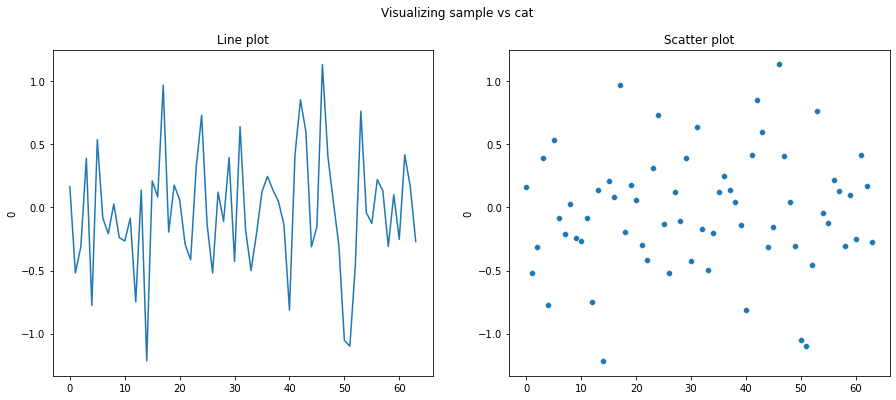

In [42]:
plot_activ(df_mean_cat)

In [43]:
def get_sample(df, cat=None):
    if cat is None:
        return df[df.pred != df.true].sample(n=1)
    else:
        return get_cat_df(df, cat)[df.pred != df.true].sample(n=1)

In [44]:
cat

'http://dbpedia.org/resource/Russia'

In [45]:
sample = get_sample(df, 'http://dbpedia.org/resource/Russia')
sample

C:\Users\maxim\AppData\Local\Temp/ipykernel_12816/370248897.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,category,input,true,pred,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Ivan_Akimov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0.882411,0.111641,0.417913,-0.163115,0.35656,0.50402,...,0.629632,0.557856,-0.550852,-0.617036,0.515044,-0.61316,0.321389,-0.354875,0.856982,-0.933014


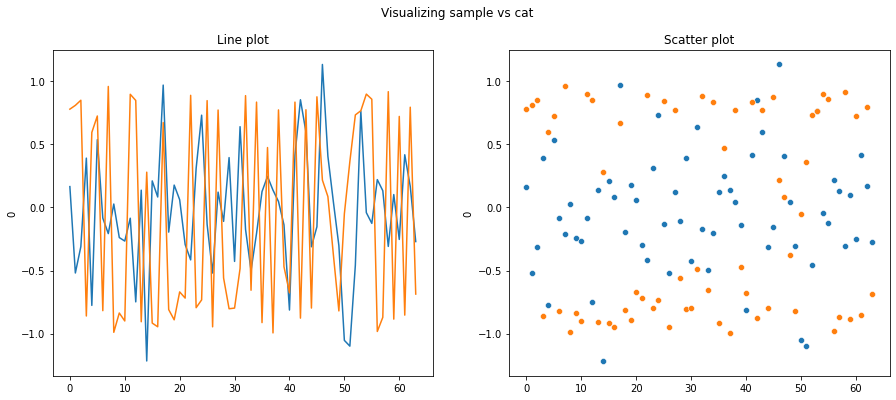

In [46]:
plot_activ(df_mean_cat, df_act_sample)

In [48]:
def get_diffs(df, sample_df):
    return sample_df.reset_index().drop(columns=['index']) - df

In [49]:
diffs = get_diffs(df_mean_cat, df_act_sample)
diffs

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
0,0.613692,1.328135,1.159485,-1.250806,1.370749,0.18739,-0.733309,1.165976,-1.016459,-0.597815,...,0.939111,0.983486,-1.203173,-1.003325,1.226052,-0.9869,0.974647,-1.270623,0.62728,-0.415989


In [50]:
avg_diff = abs(diffs).sum().sum()/len(diffs.iloc[0, :])
print(f"Average difference is: {avg_diff}")

Average difference is: 0.8544412738119718


### Re-adjust activations

On rapproche les activations du sample vers les activations de la catégorie cible d'un facteur 10% sur les neurones dont la différence est significative (i.e. pvalue < 0.01).

On a alors besoin de 3 éléments:
* le dataframe des activations du sample
* le dataframe des activations moyennes de la catégorie cible
* le dataframe des pvalues de la catégorie cible (avec maybe l'information sur la significativité de la pvalue, ici fixée à <= 0.01)

In [56]:
russia_pv = pd.read_pickle('src/russia-pv.pkl')
dfrpv = pd.DataFrame(russia_pv, columns=['pvalue'])
dfrpv

,pvalue
0,1.587716e-01
1,4.878287e-09
2,6.452485e-05
3,1.579483e-06
4,1.897656e-13
...,...
59,4.158541e-02
60,3.111701e-04
61,1.502952e-06
62,9.974529e-02


In [72]:
dfrpv['sign'] = dfrpv['pvalue'] <= 0.01
print(dfrpv[dfrpv['sign'] == True].shape)
print(dfrpv[dfrpv['sign'] == True])

(42, 2)
          pvalue  sign
1   4.878287e-09  True
2   6.452485e-05  True
3   1.579483e-06  True
4   1.897656e-13  True
5   2.738027e-11  True
7   3.096681e-03  True
9   3.773218e-03  True
10  1.769776e-03  True
12  1.351876e-13  True
14  7.951155e-24  True
15  2.011291e-03  True
17  6.368204e-23  True
19  6.570767e-03  True
21  5.796425e-05  True
22  3.067940e-07  True
23  5.675254e-05  True
24  1.612688e-10  True
26  9.286252e-11  True
29  1.690230e-06  True
30  3.268496e-09  True
31  1.080565e-11  True
32  5.932947e-03  True
33  1.684570e-11  True
34  2.491615e-03  True
36  2.208312e-03  True
40  4.088773e-18  True
41  3.012649e-08  True
42  1.058638e-14  True
43  6.252875e-12  True
44  2.203407e-05  True
46  1.785589e-24  True
47  9.985386e-08  True
49  9.544518e-05  True
50  1.910548e-19  True
51  2.097827e-18  True
52  8.469099e-08  True
53  1.930613e-16  True
56  2.021712e-03  True
58  6.567423e-05  True
60  3.111701e-04  True
61  1.502952e-06  True
63  2.292984e-04  True


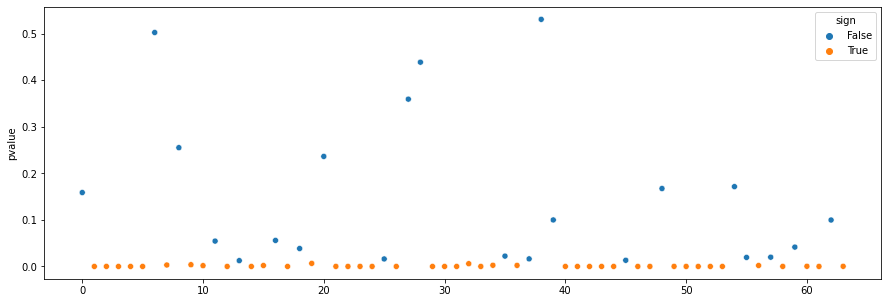

In [77]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=range(len(dfrpv['pvalue'])), y='pvalue', 
                hue='sign', data=dfrpv)
plt.show()

Pvalue dataframe with significant bool value (example for russia here)

In [78]:
dfrpv

,pvalue,sign
0,1.587716e-01,False
1,4.878287e-09,True
2,6.452485e-05,True
3,1.579483e-06,True
4,1.897656e-13,True
...,...,...
59,4.158541e-02,False
60,3.111701e-04,True
61,1.502952e-06,True
62,9.974529e-02,False


In [85]:
df_mean_cat # mean activations for a category (here russia)

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
0,0.165338,-0.519022,-0.310005,0.391009,-0.775784,0.537406,-0.08439,-0.20704,0.027329,-0.238381,...,-0.040775,-0.125858,0.220746,0.132845,-0.308484,0.102303,-0.253206,0.417666,0.167214,-0.270119


In [86]:
df_act_sample # activations for a misclassified sample of the category

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Andrew_Pavlovsky,0.77903,0.809113,0.84948,-0.859797,0.594965,0.724796,-0.817699,0.958936,-0.98913,-0.836197,...,0.898335,0.857628,-0.982427,-0.87048,0.917568,-0.884598,0.72144,-0.852957,0.794494,-0.686108


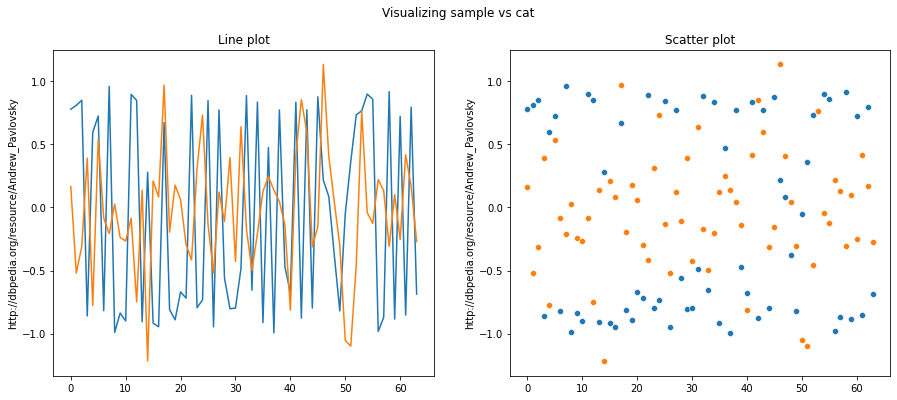

In [87]:
plot_activ(df=df_act_sample, df2=df_mean_cat)
# df in blue
# df2 in orange

In [145]:
dfrpv.set_index(df_act_sample.T.index, inplace=True)
dfrpv

,pvalue,sign
neuron_1,1.587716e-01,False
neuron_2,4.878287e-09,True
neuron_3,6.452485e-05,True
neuron_4,1.579483e-06,True
neuron_5,1.897656e-13,True
...,...,...
neuron_60,4.158541e-02,False
neuron_61,3.111701e-04,True
neuron_62,1.502952e-06,True
neuron_63,9.974529e-02,False


The formula for the new data point is : 

$$ s' = s - d * f $$

where $s'$ is the new value, $s$ is the activation value of the sample, $d$ is the difference between the sample activation and the mean activation (on the same neuron) and $f$ is the factor

In [207]:
def boost(sample, category, pvalue=None):
    """
    both of the 3 elements have the same shape
    pvalues might be reached directly from this function
    """
    
    factor = 0.1 # i.e. 10%
    
    # We built a proper dataset to process the data
    df = pd.concat([sample, category, pvalue]).T
    df.columns = [
        'sample', 'cat', 'pvalue', 'sign'
    ]
    
    df['new_value'] = df['sample']
    
    for i in range(df.shape[0]):
        index = f"neuron_{i+1}"
        if df.loc[index, "sign"] == True:
            df.loc[index, "new_value"] = df.loc[index, 'sample'] - (df.loc[index, 'sample'] - df.loc[index, 'cat']) * factor
    
    return df

In [208]:
dfb = boost(df_act_sample, df_mean_cat, dfrpv.T)
dfb

,sample,cat,pvalue,sign,new_value
neuron_1,0.77903,0.165338,0.158772,False,0.77903
neuron_2,0.809113,-0.519022,0.0,True,0.676299
neuron_3,0.84948,-0.310005,0.000065,True,0.733532
neuron_4,-0.859797,0.391009,0.000002,True,-0.734717
neuron_5,0.594965,-0.775784,0.0,True,0.45789
...,...,...,...,...,...
neuron_60,-0.884598,0.102303,0.041585,False,-0.884598
neuron_61,0.72144,-0.253206,0.000311,True,0.623975
neuron_62,-0.852957,0.417666,0.000002,True,-0.725895
neuron_63,0.794494,0.167214,0.099745,False,0.794494


In [188]:
dfb.fillna(value=dfb[dfb['sign'] == False]['new_value'])

,sample,cat,pvalue,sign,new_value
neuron_1,0.77903,0.165338,0.158772,False,NaN
neuron_2,0.809113,-0.519022,0.0,True,0.676299
neuron_3,0.84948,-0.310005,0.000065,True,0.733532
neuron_4,-0.859797,0.391009,0.000002,True,-0.734717
neuron_5,0.594965,-0.775784,0.0,True,0.45789
...,...,...,...,...,...
neuron_60,-0.884598,0.102303,0.041585,False,NaN
neuron_61,0.72144,-0.253206,0.000311,True,0.623975
neuron_62,-0.852957,0.417666,0.000002,True,-0.725895
neuron_63,0.794494,0.167214,0.099745,False,NaN


In [178]:
dfb[dfb['sign'] == False]['sample']

neuron_1      0.77903
neuron_7    -0.817699
neuron_9     -0.98913
neuron_12    0.896706
neuron_14    -0.90541
neuron_17   -0.945252
neuron_19   -0.809183
neuron_21   -0.669002
neuron_26    0.846576
neuron_28    0.772181
neuron_29   -0.558537
neuron_36   -0.912251
neuron_38   -0.993879
neuron_39     0.77298
neuron_40     -0.4694
neuron_46    0.876724
neuron_49   -0.375262
neuron_55    0.898335
neuron_56    0.857628
neuron_58    -0.87048
neuron_60   -0.884598
neuron_63    0.794494
Name: sample, dtype: object

### Display the new visualization

### Re-build the back of the model and make a prediction